In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from itertools import product

# train and test data

In [135]:

x_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]).reshape(-1, 1)
y_train = np.array([12.2, 13, 13.2, 12.8, 12.1, 13.5, 14, 13.5, 13.2, 13, 12.9, 15, 15, 14.9, 14.3, 14.2, 13.5, 14.9]).reshape(-1, 1)

x_test = np.array([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5]).reshape(-1, 1)
y_test = np.array([12.9, 13.2, 13, 12, 13.2, 13.9, 13.8, 13.2, 13, 12.9, 12.8, 15, 15, 14.8, 14.2, 14.4]).reshape(-1, 1)


# Function to train MLP and return MSE


In [136]:
def train_mlp_and_get_mse(hidden_layer_sizes):
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=10000, random_state=42)
    mlp.fit(x_train, y_train)
    y_pred = mlp.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse


# Function to plot the actual vs predicted values


In [137]:
def plot_actual_vs_predicted(model, x_test, y_test,x_train, y_train):
    y_pred = model.predict(x_test)
    plt.scatter(x_test, y_test, color='blue', label='Actual')
    plt.scatter(x_test, y_pred, color='red', label='Predicted')
    plt.scatter(x_train, y_train, color='green', label='train')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

def plot_mse_vs_hidden_layers(hidden_layer_sizes_range):
    mse_values = []
    for hidden_layer_sizes in hidden_layer_sizes_range:
        mse = train_mlp_and_get_mse(hidden_layer_sizes)
        mse_values.append(mse)

    plt.plot(hidden_layer_sizes_range, mse_values, marker='o')
    plt.xlabel('Hidden Layer Sizes')
    plt.ylabel('Mean Squared Error')
    plt.title('MSE vs Hidden Layer Sizes')
    plt.show()


# Function to find the best number of neurons and layers


In [138]:
def find_best_neurons_and_layers(hidden_layer_sizes_range):
    best_mse = float('inf')
    best_hidden_layer_sizes = None

    for hidden_layer_sizes in hidden_layer_sizes_range:
        mse = train_mlp_and_get_mse(hidden_layer_sizes)
        if mse < best_mse:
            best_mse = mse
            best_hidden_layer_sizes = hidden_layer_sizes

    return best_hidden_layer_sizes, best_mse

def plot_mse_vs_neurons(neurons_range, layers):
    mse_values = []
    for neurons in neurons_range:
        hidden_layer_sizes = (neurons,) * layers
        mse = train_mlp_and_get_mse(hidden_layer_sizes)
        mse_values.append(mse)

    plt.plot(neurons_range, mse_values, marker='o')
    plt.xlabel('Number of Neurons')
    plt.ylabel('Mean Squared Error')
    plt.title(f'MSE vs Number of Neurons for {layers} Layers')
    plt.show()

# Treain the MLP

C:\Users\reza\Documents\GitHub\MLP\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\reza\Documents\GitHub\MLP\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\reza\Documents\GitHub\MLP\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reza\Documents\GitHub\MLP\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-ve

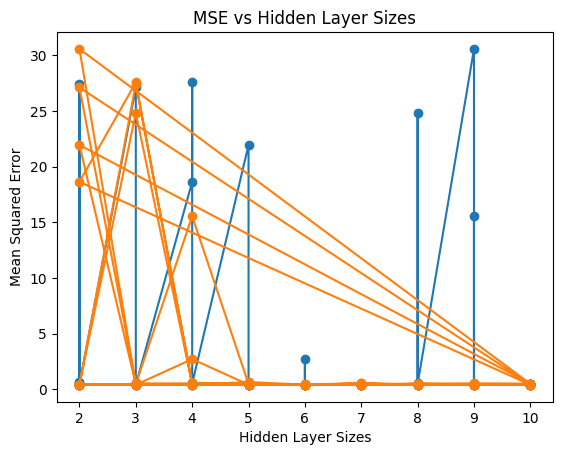

C:\Users\reza\Documents\GitHub\MLP\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\reza\Documents\GitHub\MLP\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\reza\Documents\GitHub\MLP\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reza\Documents\GitHub\MLP\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-ve

MLPRegressor(hidden_layer_sizes=(8, 5), max_iter=10000, random_state=42)

In [139]:
hidden_layer_sizes_range = list(product(range(2, 11), repeat=2))


# Plot MSE vs Hidden Layer Sizes
plot_mse_vs_hidden_layers(hidden_layer_sizes_range)

# Find the best number of neurons and layers
best_hidden_layer_sizes, best_mse = find_best_neurons_and_layers(hidden_layer_sizes_range)

# Train the best model
best_model = MLPRegressor(hidden_layer_sizes=best_hidden_layer_sizes, max_iter=10000, random_state=42)
best_model.fit(x_train, y_train)



# Test result
The best result after I tested different layers and neurons
- identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x
- logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).
- 'relu', the rectified linear unit function, returns f(x) = max(0, x)

C:\Users\reza\Documents\GitHub\MLP\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


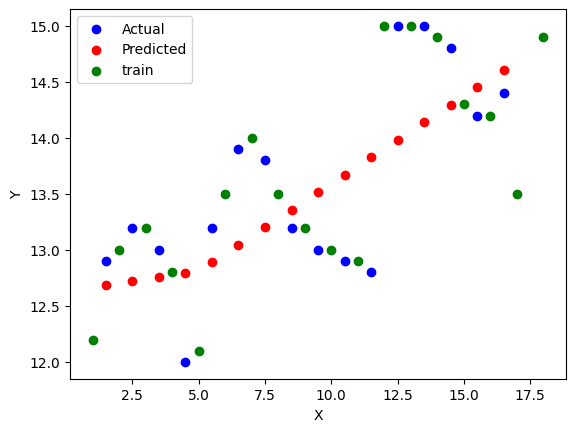

In [140]:
best_model2  = MLPRegressor(hidden_layer_sizes=(8,5),activation="relu", max_iter=10000, random_state=42)
best_model2.learning_rate_init = 0.001
best_model2.fit(x_train, y_train)
plot_actual_vs_predicted(best_model2, x_test, y_test,x_train, y_train)


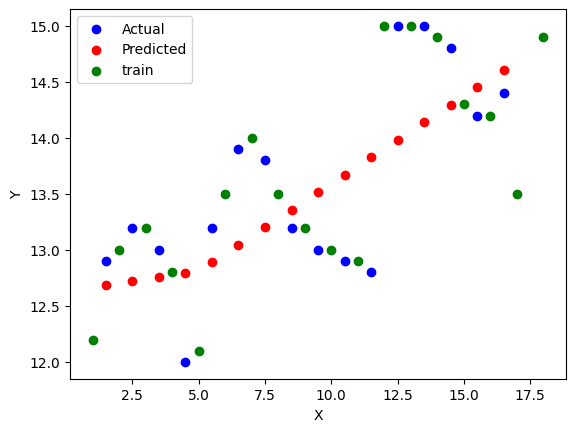

Best Hidden Layer Sizes: (8, 5)
Best Mean Squared Error: 0.3884345089851256


C:\Users\reza\Documents\GitHub\MLP\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\reza\Documents\GitHub\MLP\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\reza\Documents\GitHub\MLP\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\reza\Documents\GitHub\MLP\venv\Lib\site-packages\sklearn\neural_network\_multilayer_p

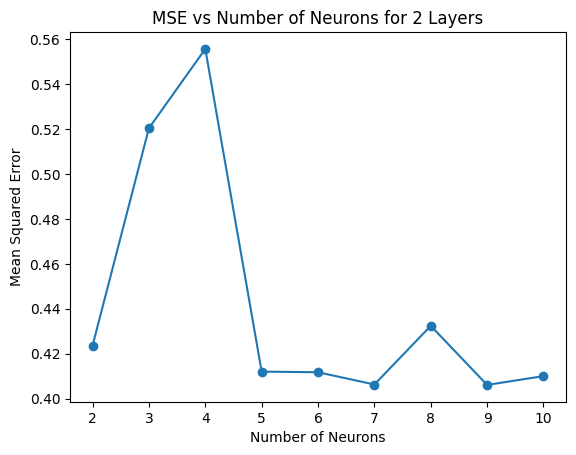

In [141]:
# Plot actual vs predicted values for the best model
plot_actual_vs_predicted(best_model, x_test, y_test,x_train, y_train)

# Print the best parameters and MSE
print("Best Hidden Layer Sizes:", best_hidden_layer_sizes)
print("Best Mean Squared Error:", best_mse)

neurons_range = range(2, 11)
plot_mse_vs_neurons(neurons_range, len(best_hidden_layer_sizes))